# Exercise 

From sklearn.datasets load digits dataset and do following

- Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
- Plot confusion matrix
- Plot classification report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target'] = digits.target
df.head().T

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,7.0,0.0
3,13.0,12.0,4.0,15.0,1.0
4,9.0,13.0,15.0,13.0,11.0
...,...,...,...,...,...
60,10.0,16.0,11.0,13.0,16.0
61,0.0,10.0,16.0,9.0,4.0
62,0.0,0.0,9.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0


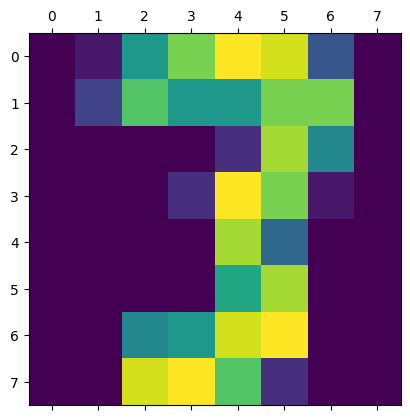

In [6]:
plt.matshow(digits.images[23])

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

X = df.drop('target', axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
df.shape

(1797, 65)

In [9]:
print(len(X_train))
print(len(X_test))

1437
360


Let us try with a random number of k = 3

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
import numpy as np

# Convert input data to a contiguous array
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

knn.score(X_test, y_test)

0.9916666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test))
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 28]])

Text(0.5, 1.0, 'Confusion Matrix')

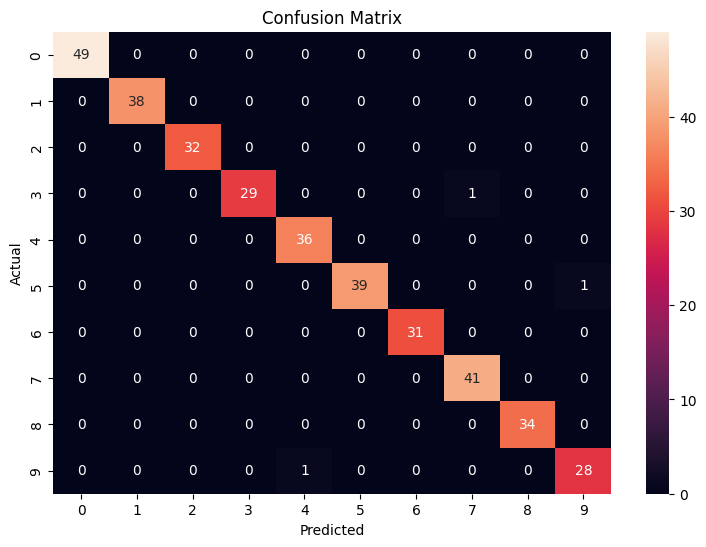

In [18]:
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.98        30
           4       0.97      1.00      0.99        36
           5       1.00      0.97      0.99        40
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        41
           8       1.00      1.00      1.00        34
           9       0.97      0.97      0.97        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

